In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [2]:
# preprocessing
from util import preprocessData, createFeatures

(ratings, reviews) = preprocessData('sportsTrain.csv')

In [3]:
# Building a dictionary
dic = {}
for review in reviews:
    for word in review.split():
        dic[word] = dic.get(word, 0) + 1
print(len(dic))

186490


In [4]:
# keeping words that occurs over 500 times
occurenceThreshold = 500
wordToIndex = {}
indexToWord = []
for key, value in dic.items():
    if value > occurenceThreshold:
        indexToWord.append(key)
        wordToIndex[key] = len(indexToWord) - 1
n = len(wordToIndex)
print(len(wordToIndex), len(indexToWord))

7400 7400


In [5]:
(ratingsVal, reviewsVal) = preprocessData('sportsDev.csv')
print(len(ratingsVal))
(Xval, yval) = createFeatures(reviewsVal, ratingsVal, wordToIndex, 10000)

284248


In [6]:
(ratingsTest, reviewsTest) = preprocessData('sportsTest.csv')
print(len(ratingsTest))
(Xtest, ytest) = createFeatures(reviewsTest, ratingsTest, wordToIndex, 10000)

284081


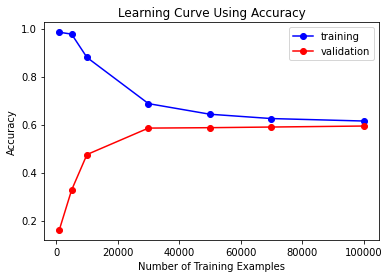

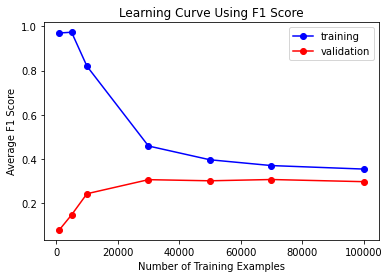

In [7]:
from sklearn.linear_model import LinearRegression
from util import linRegPredict, evalModel

# Plotting the learning curve
trainSizes = [1000, 5000, 10000, 30000, 50000, 70000, 100000]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for trainSize in trainSizes:
    # create feature vector and labels
    (X, y) = createFeatures(reviews, ratings, wordToIndex, trainSize)
    # train a linear model
    linReg = LinearRegression().fit(X, y)
    (valAcc, valF1, _) = evalModel(linRegPredict(linReg, Xval), yval)
    (trainAcc, trainF1, _) = evalModel(linRegPredict(linReg, X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(trainSizes, trainAccs, 'bo-', label = 'training')
plt.plot(trainSizes, valAccs, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(trainSizes, trainF1s, 'bo-', label = 'training')
plt.plot(trainSizes, valF1s, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

In [8]:
(testAcc, testF1, confM) = evalModel(linRegPredict(linReg, Xtest), ytest)
print(testAcc)
print(testF1)
print(confM.astype(np.int))

0.6055
0.29558877035936487
[[  19   43  149  191   12]
 [  12   23   87  176   16]
 [   3   30  112  451   78]
 [   2    9  105  763  649]
 [   2   10   80 1840 5138]]


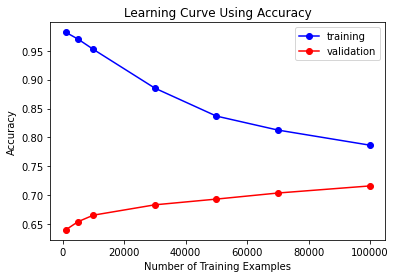

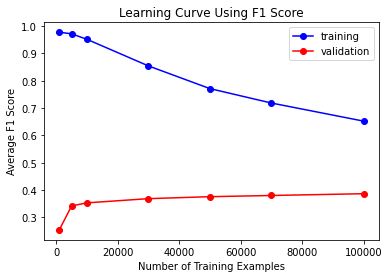

In [9]:
from sklearn.svm import LinearSVC
from util import evalModel

# Plotting the learning curve
trainSizes = [1000, 5000, 10000, 30000, 50000, 70000, 100000]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for trainSize in trainSizes:
    # create feature vector and labels
    (X, y) = createFeatures(reviews, ratings, wordToIndex, trainSize)
    # train a linear model
    svmModel = LinearSVC(dual = False, max_iter=5000).fit(X, y)
    (valAcc, valF1, _) = evalModel(svmModel.predict(Xval), yval)
    (trainAcc, trainF1, _) = evalModel(svmModel.predict(X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(trainSizes, trainAccs, 'bo-', label = 'training')
plt.plot(trainSizes, valAccs, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(trainSizes, trainF1s, 'bo-', label = 'training')
plt.plot(trainSizes, valF1s, 'ro-', label = 'validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

In [10]:
(testAcc, testF1, confM) = evalModel(svmModel.predict(Xtest), ytest)
print(testAcc)
print(testF1)
print(confM.astype(np.int))

0.7261
0.3798582796094844
[[ 154   47   30   18  165]
 [  59   36   38   29  152]
 [  44   31  107  126  366]
 [  16   24   98  280 1110]
 [  33   25   68  260 6684]]


In [11]:
(valAcc, valF1, confM) = evalModel(svmModel.predict(Xval), yval)
print(valAcc)
print(valF1)
print(confM.astype(np.int))

0.7162
0.3868522740113925
[[ 149   39   34   21  173]
 [  54   54   53   30  161]
 [  36   42  109  129  343]
 [  26   24   86  298 1205]
 [  38   31   73  240 6552]]


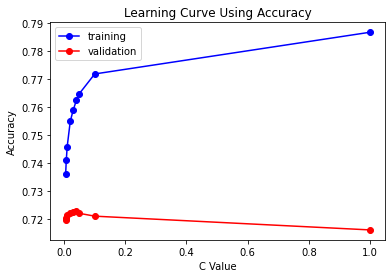

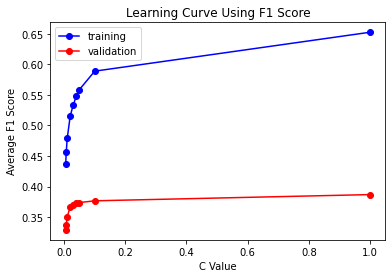

In [11]:
from sklearn.svm import LinearSVC
from util import linRegPredict, evalModel

# Plotting the learning curve
Cvalues = [1, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01, 0.007, 0.005]
trainAccs = []
valAccs = []
trainF1s = []
valF1s = []

for C in Cvalues:
    # create feature vector and labels
    (X, y) = createFeatures(reviews, ratings, wordToIndex, 100000)
    # train a linear model
    svmModel = LinearSVC(dual = False, max_iter=5000, C=C).fit(X, y)
    (valAcc, valF1, _) = evalModel(svmModel.predict(Xval), yval)
    (trainAcc, trainF1, _) = evalModel(svmModel.predict(X), y)
    trainAccs.append(trainAcc)
    valAccs.append(valAcc)
    trainF1s.append(trainF1)
    valF1s.append(valF1)

# plot
plt.title('Learning Curve Using Accuracy')
plt.plot(Cvalues, trainAccs, 'bo-', label = 'training')
plt.plot(Cvalues, valAccs, 'ro-', label = 'validation')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Learning Curve Using F1 Score')
plt.plot(Cvalues, trainF1s, 'bo-', label = 'training')
plt.plot(Cvalues, valF1s, 'ro-', label = 'validation')
plt.xlabel('C Value')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (2,)

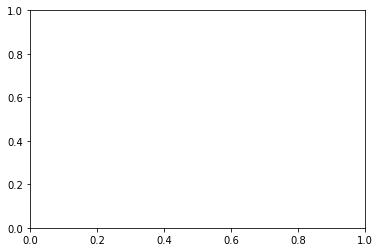

In [19]:
# plot
Cvalues = np.log(np.array([1, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01, 0.007, 0.005]))


plt.plot(Cvalues, trainAccs, 'bo-', label = 'training')
plt.plot(Cvalues, valAccs, 'ro-', label = 'validation')
plt.xlim(0.5, -5.5)
plt.xlabel('Log of C Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(Cvalues, trainF1s, 'bo-', label = 'training')
plt.plot(Cvalues, valF1s, 'ro-', label = 'validation')
plt.xlim(0.5, -5.5)
plt.xlabel('Log of C Value')
plt.ylabel('Average F1 Score')
plt.legend()
plt.show()